<a href="https://colab.research.google.com/github/Akshay-S-12/Mask-VGG19-/blob/main/Mask(vgg19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=[224,224] #input image size


In [3]:
train_path='/content/drive/MyDrive/Maskdata'
test_path='/content/drive/MyDrive/Maskdatatest'

In [4]:
vgg=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
#must do
for layer in vgg.layers:
  layer.trainable=False


In [6]:
#i/p==>convolutional layer===>pooling layer===>flatten
#vgg.output (predefined variable)

In [7]:
#output
x=Flatten()(vgg.output)
prediction=Dense(2,activation='softmax')(x)

In [8]:
model=Model(inputs=vgg.input,outputs=prediction)

In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 3150 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [12]:
r=model.fit(training_set,validation_data=test_set,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
97/99 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step - accuracy: 0.7973 - loss: 0.4183

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 741s 7s/step - accuracy: 0.8003 - loss: 0.4126 - val_accuracy: 0.9706 - val_loss: 0.0859
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 54s 539ms/step - accuracy: 0.9663 - loss: 0.0825 - val_accuracy: 0.9804 - val_loss: 0.0526
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 55s 549ms/step - accuracy: 0.9645 - loss: 0.0928 - val_accuracy: 0.9706 - val_loss: 0.1068
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 55s 547ms/step - accuracy: 0.9833 - loss: 0.0486 - val_accuracy: 0.9804 - val_loss: 0.1067
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 54s 547ms/step - accuracy: 0.9883 - loss: 0.0429 - val_accuracy: 0.9804 - val_loss: 0.0301


In [13]:
r.history

{'accuracy': [0.8984127044677734,
  0.961904764175415,
  0.9669841527938843,
  0.9857142567634583,
  0.986984133720398],
 'loss': [0.2283777892589569,
  0.10076165944337845,
  0.0858210027217865,
  0.042729105800390244,
  0.04514539986848831],
 'val_accuracy': [0.970588207244873,
  0.9803921580314636,
  0.970588207244873,
  0.9803921580314636,
  0.9803921580314636],
 'val_loss': [0.08587279170751572,
  0.052643924951553345,
  0.10676277428865433,
  0.10666152834892273,
  0.030081700533628464]}

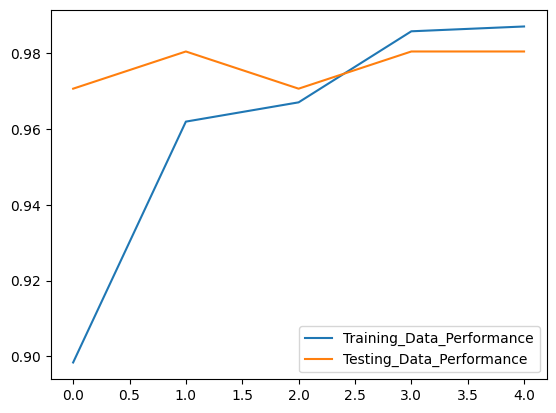

In [14]:
plt.plot(r.history['accuracy'],label='Training_Data_Performance')
plt.plot(r.history['val_accuracy'],label='Testing_Data_Performance')
plt.legend()
plt.show()

In [15]:
from skimage.io import imread
from skimage.transform import resize

In [16]:
def predict(imagepath,model):
  img=imread(imagepath)
  img1=resize(img,(224,224))
  img1=img1.reshape(1,224,224,3)
  pred=model.predict(img1)
  ind=pred.argmax()
  datadir=['without_mask','with_mask']
  datadir.sort()
  print(datadir[ind])

In [17]:
imagepath='/content/drive/MyDrive/Maskdata/with_mask/with_mask_1227.jpg'
predict(imagepath,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
with_mask


In [18]:
imagepath='/content/drive/MyDrive/Maskdata/without_mask/without_mask_1003.jpg'
predict(imagepath,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
without_mask
